In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [102]:
df=pd.read_csv('restaurant_sales_data.csv')
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


In [103]:
df.head(10)

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
6,ORD_270994,CUST_071,Side Dishes,Garlic Bread,4.0,5.0,20.0,2022-08-19,Credit Card
7,ORD_146656,CUST_077,Main Dishes,NaN,15.0,3.0,45.0,2023-02-15,Cash
8,ORD_428611,CUST_083,Desserts,NaN,6.0,2.0,12.0,2023-12-16,Cash
9,ORD_743636,CUST_085,Main Dishes,Vegetarian Platter,14.0,5.0,70.0,2022-08-07,NaN


In [104]:
df.tail(10)

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
17524,ORD_603601,CUST_083,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-11-08,Credit Card
17525,ORD_326555,CUST_095,Main Dishes,Pasta Alfredo,12.0,3.0,36.0,2023-07-24,Digital Wallet
17526,ORD_503140,CUST_094,Main Dishes,Pasta Alfredo,12.0,3.0,36.0,2023-04-10,Credit Card
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet
17533,ORD_680707,CUST_006,Desserts,NaN,7.0,4.0,28.0,2023-01-07,NaN


In [105]:
info= df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


In [106]:
describe= df.describe()
describe

,Price,Quantity,Order Total
count,16658.000000,17104.000000,17104.000000
mean,6.586325,3.014149,19.914494
std,4.834652,1.414598,18.732549
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,7.500000
50%,5.000000,3.000000,15.000000
75%,7.000000,4.000000,25.000000
max,20.000000,5.000000,100.000000


Missing Values:


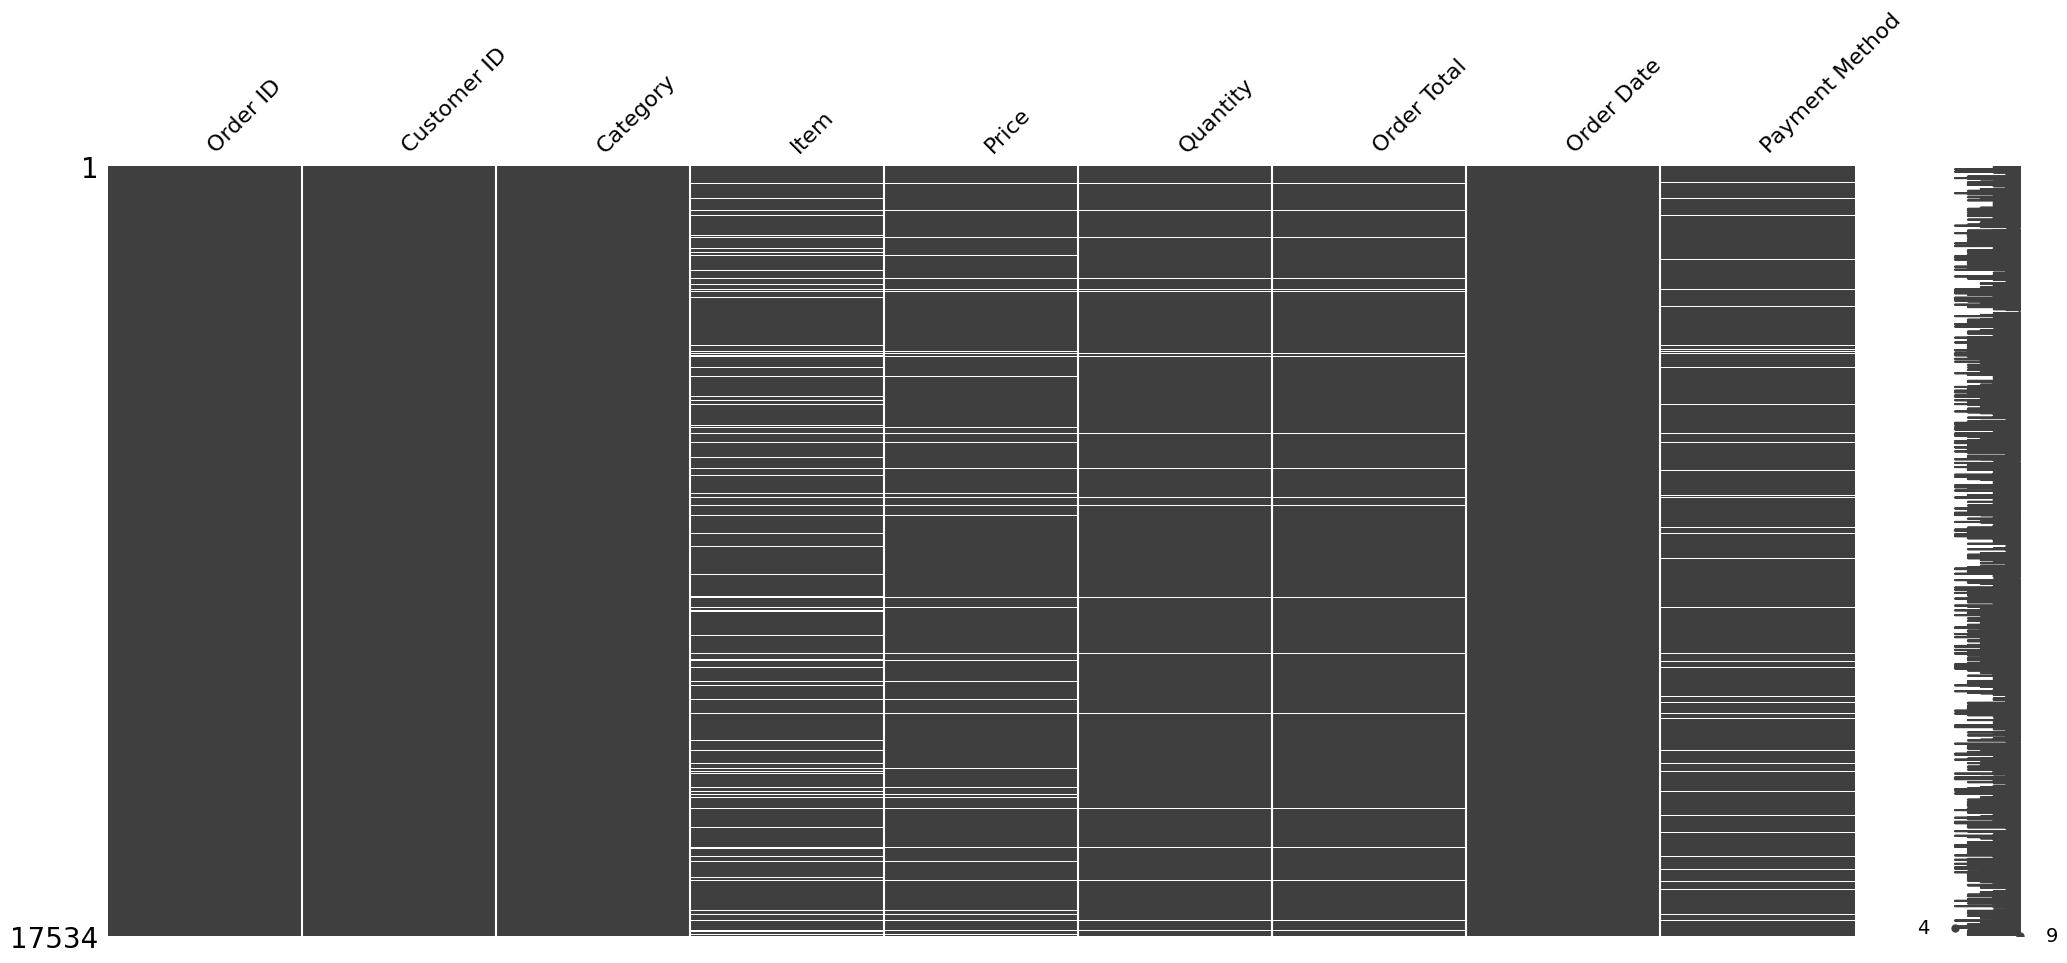

In [107]:
print("Missing Values:")
msno.matrix(df)
plt.show()

In [108]:
df.shape

(17534, 9)

In [109]:
df.columns

Index(['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity',
       'Order Total', 'Order Date', 'Payment Method'],
      dtype='object')

In [110]:
df['Order Date'].isnull().sum()

np.int64(0)

In [111]:
df['Price'].isnull().sum()

np.int64(876)

In [112]:
df['Category'].isnull().sum()

np.int64(0)

In [113]:
subset=df[["Quantity","Price","Category"]]
subset

,Quantity,Price,Category
0,1.0,3.0,Side Dishes
1,3.0,4.0,Side Dishes
2,4.0,15.0,Main Dishes
3,2.0,NaN,Drinks
4,4.0,12.0,Main Dishes
...,...,...,...
17529,4.0,NaN,Drinks
17530,3.0,5.0,Desserts
17531,4.0,5.0,Desserts
17532,2.0,4.0,Side Dishes


In [114]:
df.isnull().sum()


Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity           430
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64

In [115]:

df.dtypes

Order ID           object
Customer ID        object
Category           object
Item               object
Price             float64
Quantity          float64
Order Total       float64
Order Date         object
Payment Method     object
dtype: object

In [116]:
df.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [118]:
print("Checking outliers in the Quantity:")
col = df['Quantity']  
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(col < lower_bound) | (col > upper_bound)]

print("Number of outliers:", outliers.shape[0])
outliers

Checking outliers in the Quantity:
Number of outliers: 0


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method


Missing Values :
Before Removal Missing values in Quantity


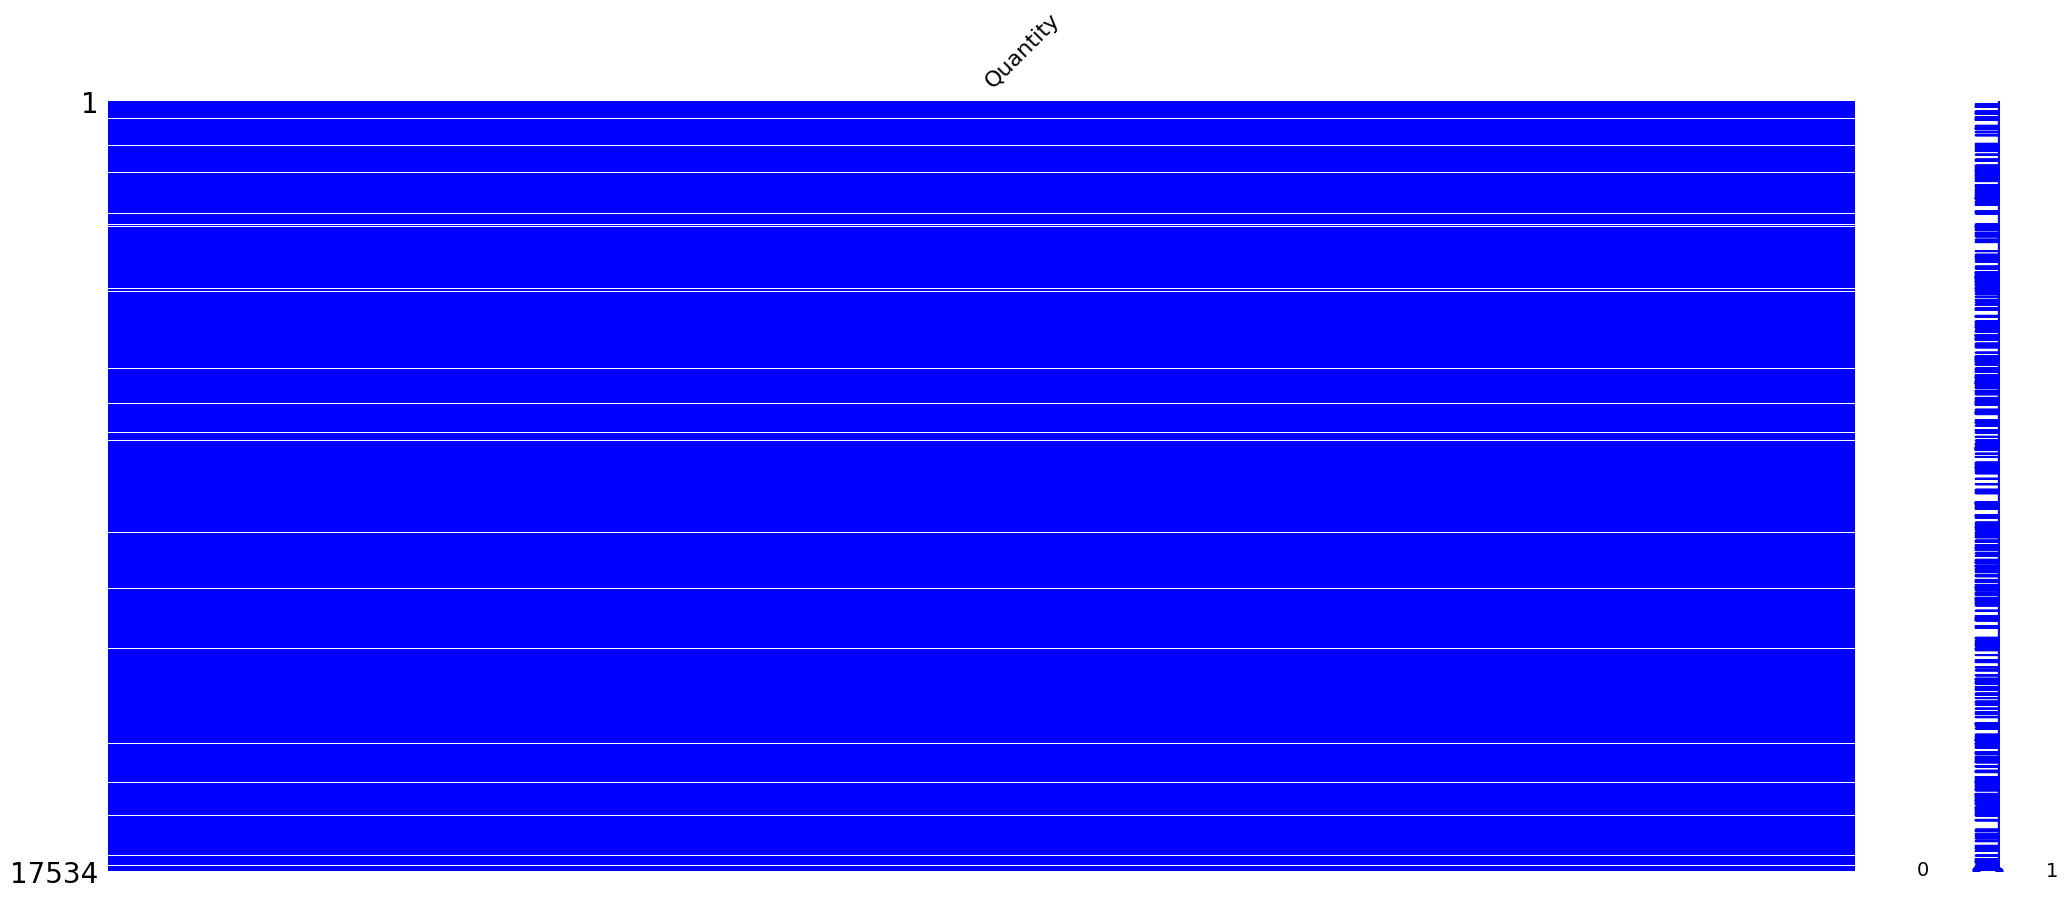

In [119]:
print("Missing Values :")
print("Before Removal Missing values in Quantity")
msno.matrix(df[['Quantity']], color=(0, 0, 1))
plt.show()

In [120]:
df['Quantity'].dtypes

dtype('float64')

In [121]:
df['Quantity'].isnull().sum()

np.int64(430)

In [122]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_quantity = df[
    (df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)
]

print("Number of outliers in Quantity:", outliers_quantity.shape[0])



Number of outliers in Quantity: 0


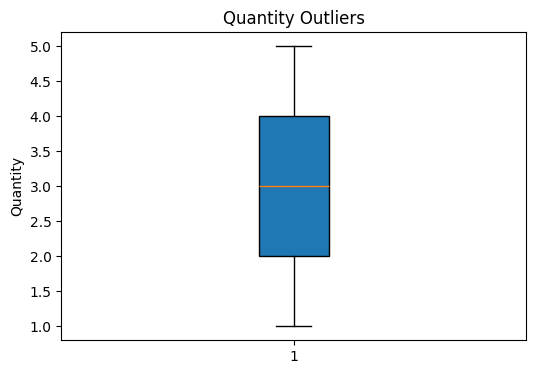

In [123]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    df['Quantity'].dropna(),
    vert=True,
    patch_artist=True
)
plt.title('Quantity Outliers')
plt.ylabel('Quantity')
plt.show()


In [124]:
print("Why not used Mean:")
print("""Right-skewed (many small values, few very large ones)
Has outliers (bulk purchases, errors, promotions)
Mean is sensitive to outliers, so a few large quantities can distort it.""")

Why not used Mean:
Right-skewed (many small values, few very large ones)
Has outliers (bulk purchases, errors, promotions)
Mean is sensitive to outliers, so a few large quantities can distort it.


In [125]:
df["Quantity"].fillna(df["Quantity"].median(), inplace=True)


After Removal of Missing Quantity values
Missing Values :


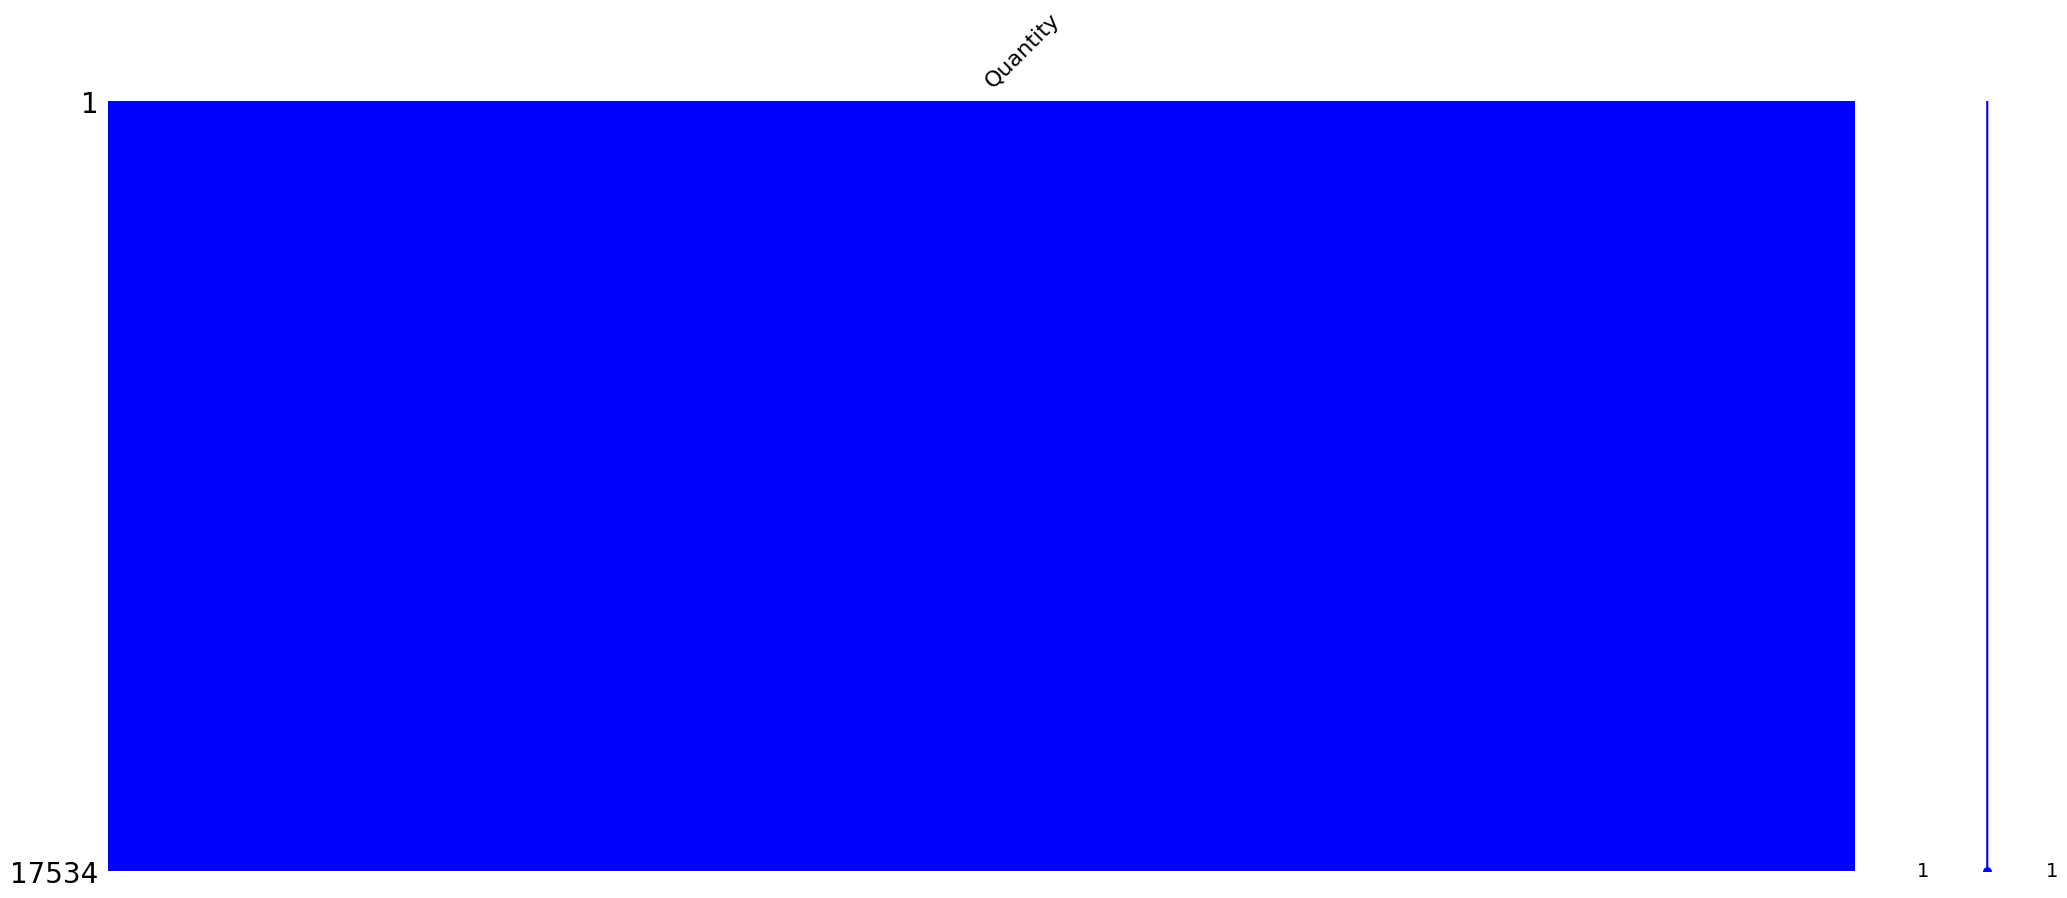

In [126]:
print("After Removal of Missing Quantity values")
print("Missing Values :")
msno.matrix(df[['Quantity']], color=(0, 0, 1))
plt.show()

In [127]:
print("No of Missing Values after removing:")
count = df['Quantity'].isnull().sum()
print(int(count))


No of Missing Values after removing:
0


In [132]:
df.isnull().sum()

Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity             0
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64

In [131]:
count=df['Item'].isnull().sum()
print("No of Missing Values:")
print(int(count))

No of Missing Values:
1758


In [138]:
df['Item'].head()

0         Side Salad
1    Mashed Potatoes
2    Grilled Chicken
3                NaN
4      Pasta Alfredo
Name: Item, dtype: object

Missing Values:


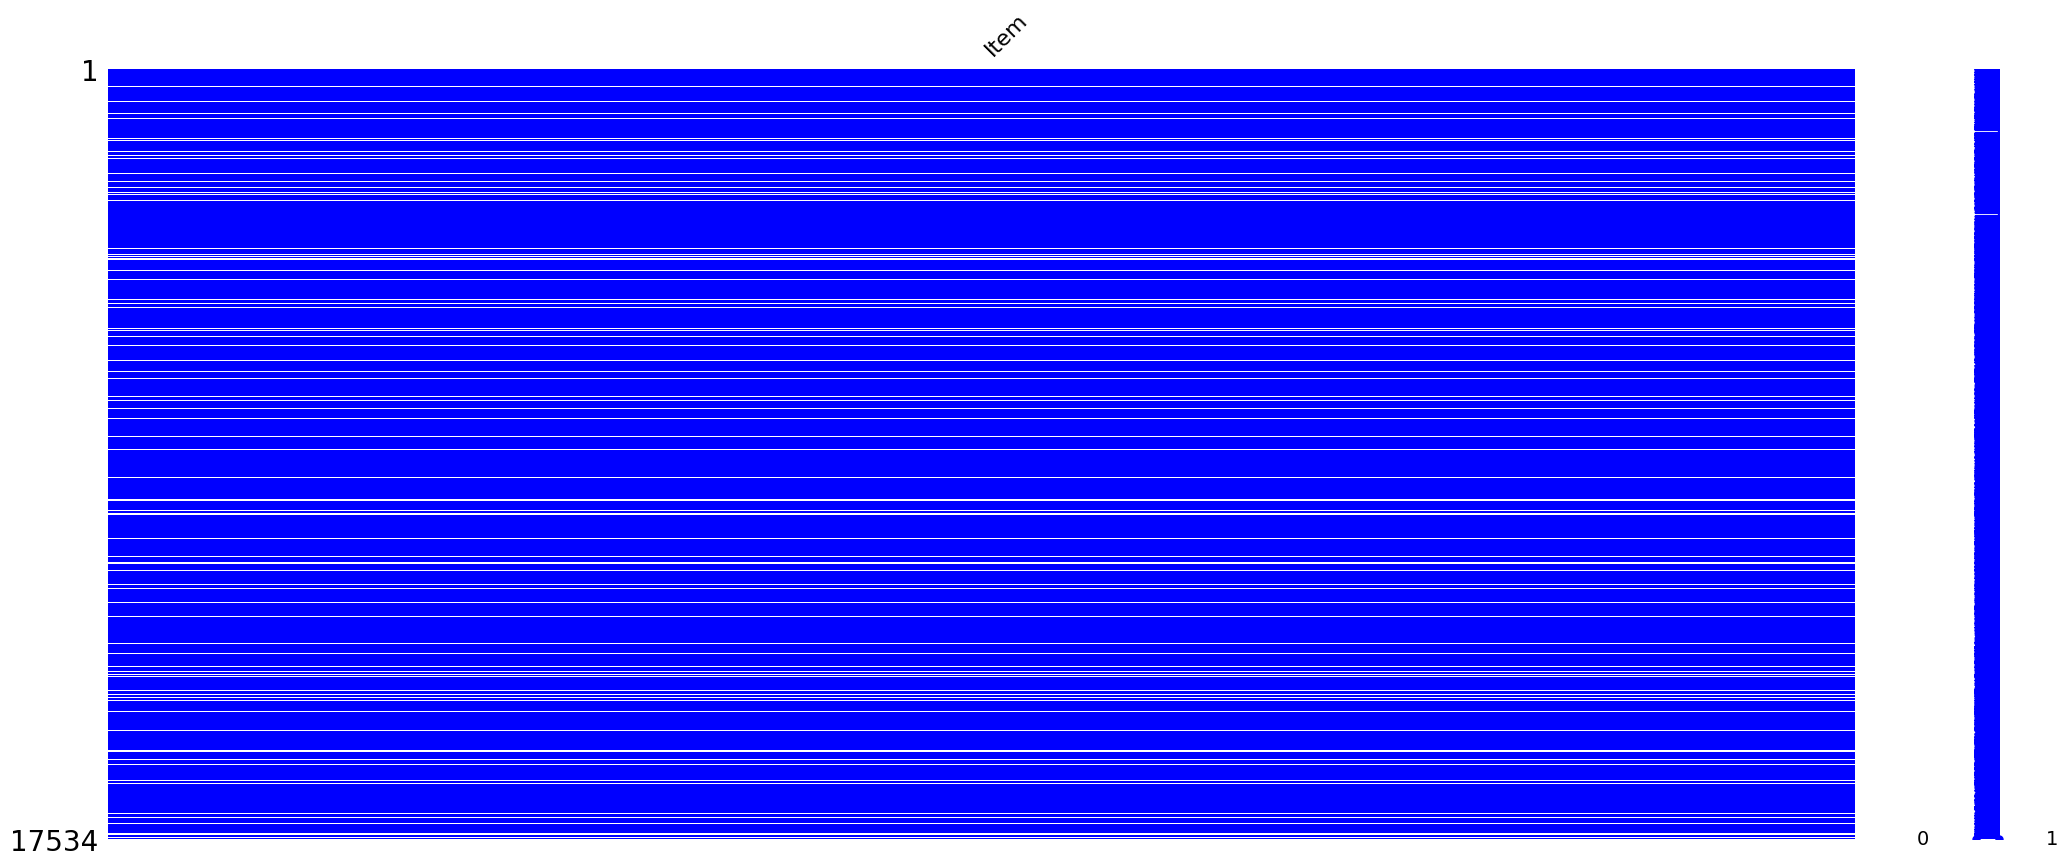

In [144]:
import missingno as msno
import matplotlib.pyplot as plt

print("Missing Values:")
msno.matrix(df[['Item']], color=(0, 0, 1))
plt.show()


In [145]:
mode_value = df['Item'].mode()[0]
df.fillna({'Item': mode_value}, inplace=True)




Missing Values in Item After removal:


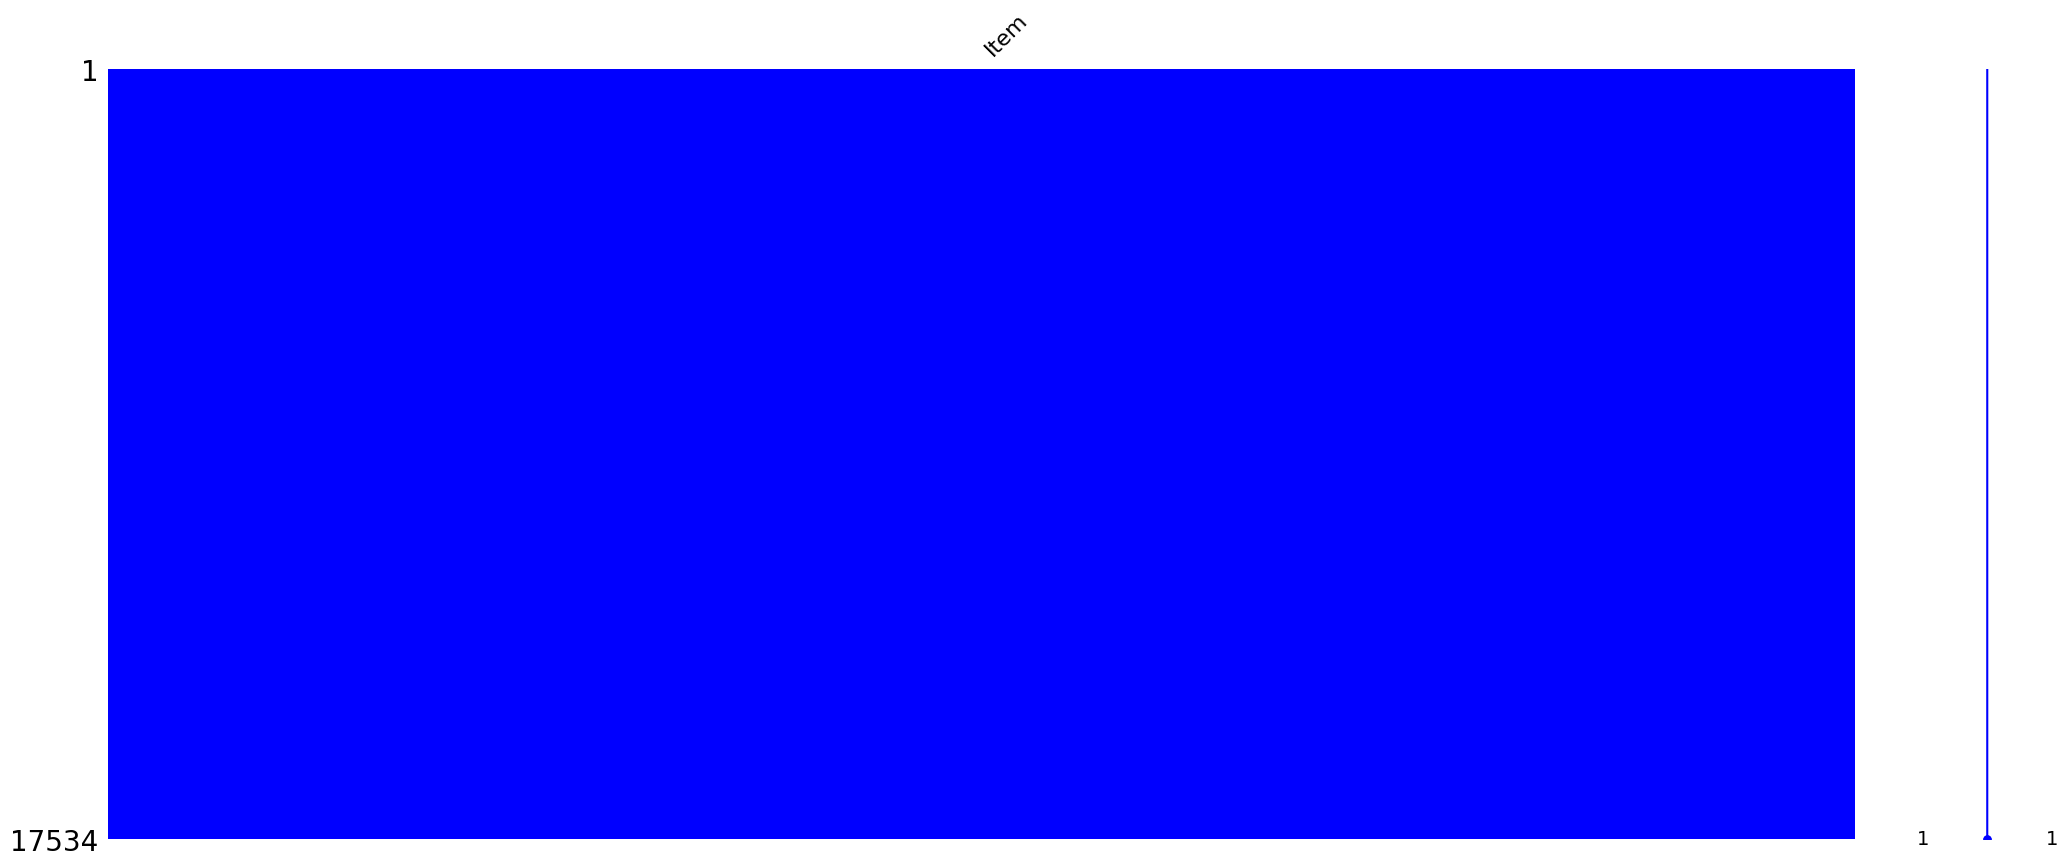

In [146]:
import missingno as msno
print("Missing Values in Item After removal:")
msno.matrix(df[['Item']], color=(0, 0, 1))
plt.show()

In [167]:
print("After Removal of Misssing values:")
count=df['Item'].isnull().sum()
print(int(count))

After Removal of Misssing values:
0


In [155]:
print(""" Item is the Categorical data so there is no outliers detiction because of non numeric so we should
just only see the rare items in the item column . rare item is that which is sold very less.""")

 Item is the Categorical data so there is no outliers detiction because of non numeric so we should
just only see the rare items in the item column . rare item is that which is sold very less.


In [156]:
item_counts = df['Item'].value_counts()
rare_items = item_counts[item_counts < 5]   
print("Number of rare items:", rare_items.shape[0])



Number of rare items: 0


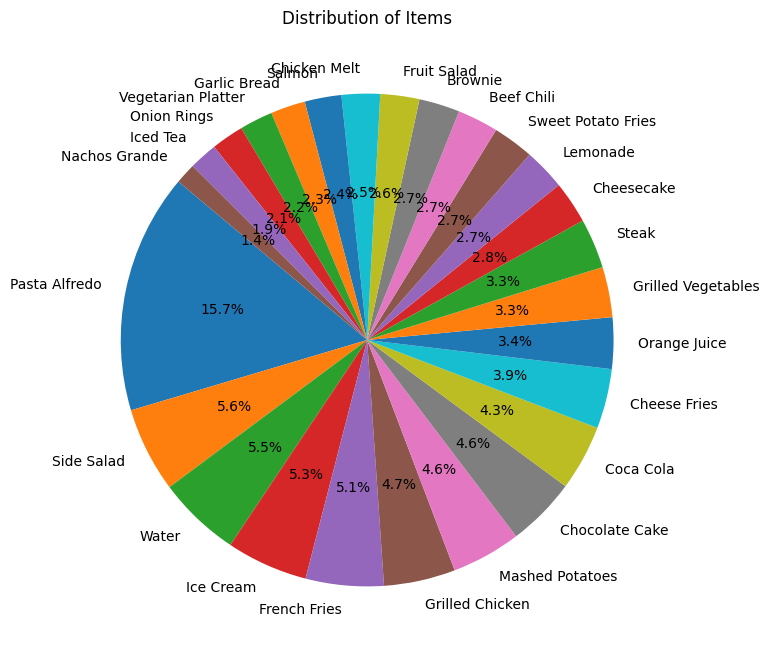

In [161]:
import matplotlib.pyplot as plt

item_counts = df['Item'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Items')
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7628\1535606215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


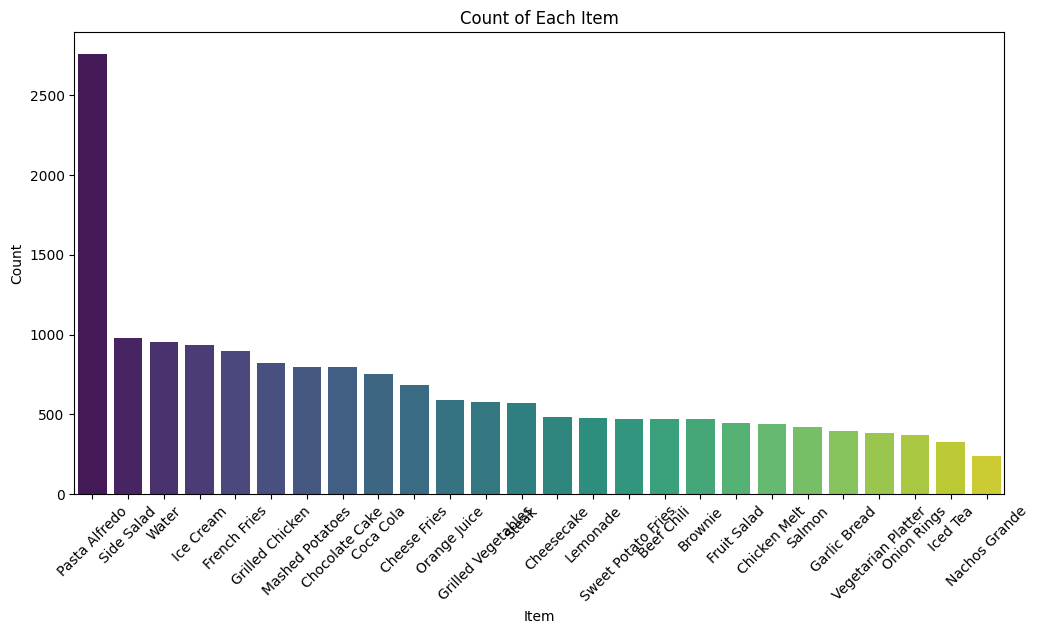

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(
    data=df, 
    x='Item', 
    order=df['Item'].value_counts().index, 
    palette='viridis', 
    hue=None
)
plt.title('Count of Each Item')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [168]:
df.isnull().sum()

Order ID             0
Customer ID          0
Category             0
Item                 0
Price              876
Quantity             0
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64

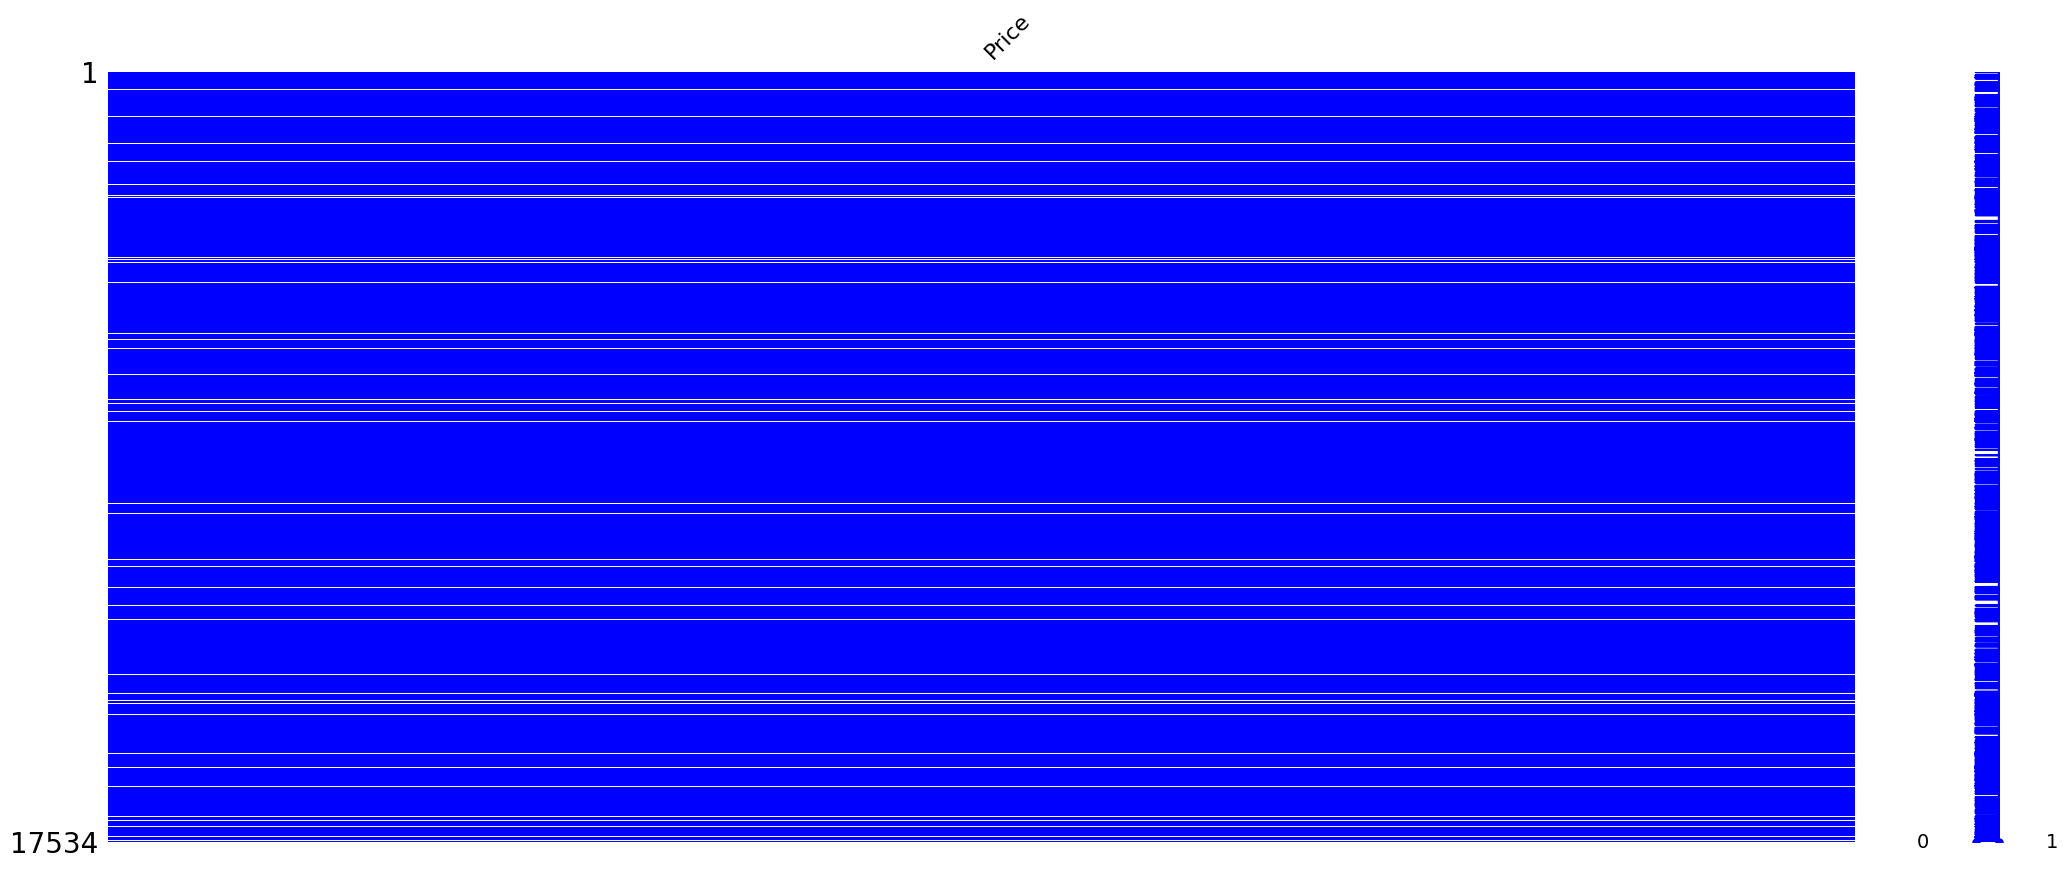

In [172]:
import missingno as msno
msno.matrix(df[['Price']],color=(0,0,1))
plt.show()


In [175]:
print("No of Missing values:")
count=df['Price'].isnull().sum()
print(int(count))

No of Missing values:
876


In [176]:
df['Price'].head()

0     3.0
1     4.0
2    15.0
3     NaN
4    12.0
Name: Price, dtype: float64

In [178]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df[
    (df['Price'] < lower_bound) | (df['Price'] > upper_bound)
]

print("Number of outliers in Price:", outliers_price.shape[0])

Number of outliers in Price: 2311


In [183]:
df['Price'].describe()

count    16658.000000
mean         6.586325
std          4.834652
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         20.000000
Name: Price, dtype: float64

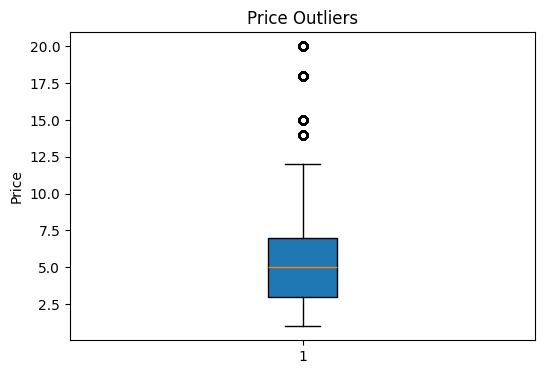

In [184]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    df['Price'].dropna(),
    vert=True,
    patch_artist=True
)
plt.title('Price Outliers')
plt.ylabel('Price')
plt.show()


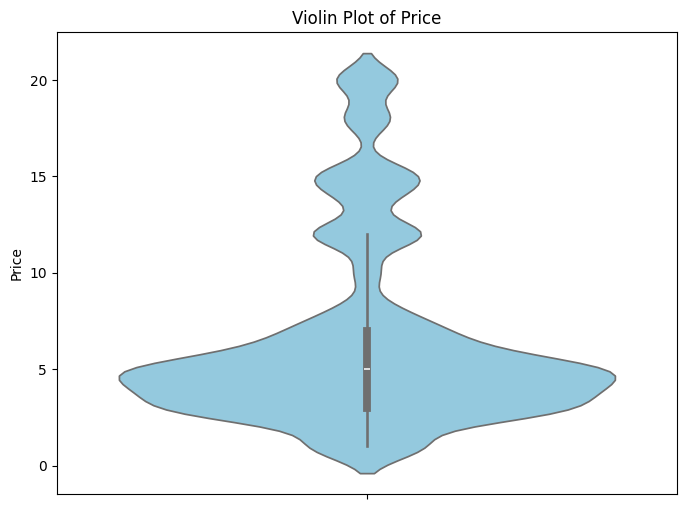

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.violinplot(y=df['Price'], color='skyblue')
plt.title('Violin Plot of Price')
plt.ylabel('Price')
plt.show()


In [188]:
df['Price'].head(10)

0     3.0
1     4.0
2    15.0
3     NaN
4    12.0
5    18.0
6     4.0
7    15.0
8     6.0
9    14.0
Name: Price, dtype: float64

In [192]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Price_clipped'] = df['Price'].clip(lower=lower_bound, upper=upper_bound)

print(df[['Price', 'Price_clipped']].head(10))



   Price  Price_clipped
0    3.0            3.0
1    4.0            4.0
2   15.0           13.0
3    NaN            NaN
4   12.0           12.0
5   18.0           13.0
6    4.0            4.0
7   15.0           13.0
8    6.0            6.0
9   14.0           13.0


In [193]:
df['Price'].describe()

count    16658.000000
mean         6.586325
std          4.834652
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         20.000000
Name: Price, dtype: float64

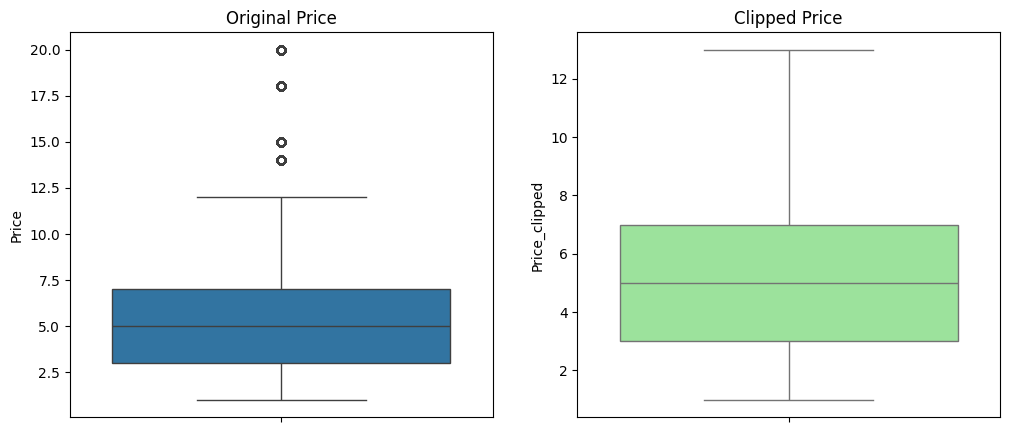

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['Price'])
plt.title('Original Price')

plt.subplot(1,2,2)
sns.boxplot(y=df['Price_clipped'], color='lightgreen')
plt.title('Clipped Price')

plt.show()


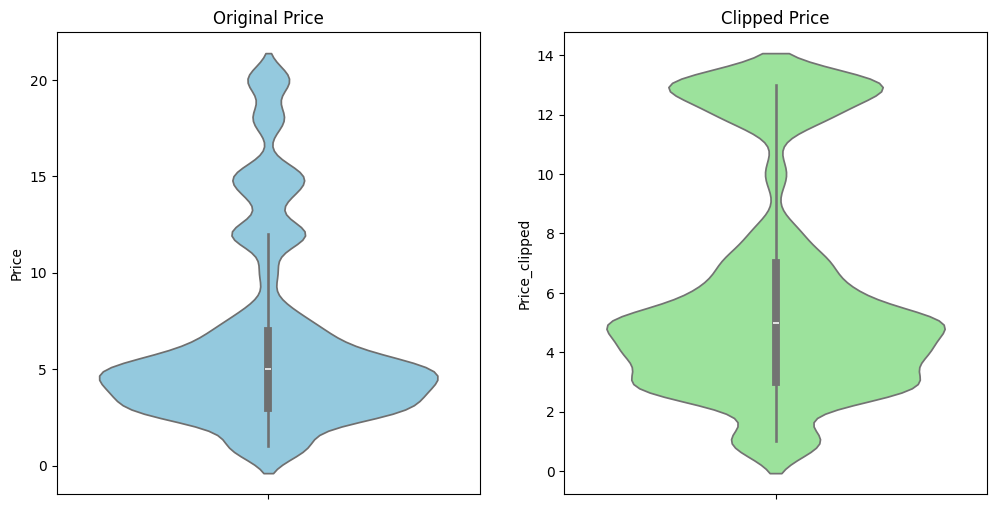

In [196]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.violinplot(y=df['Price'], color='skyblue')
plt.title('Original Price')

plt.subplot(1,2,2)
sns.violinplot(y=df['Price_clipped'], color='lightgreen')
plt.title('Clipped Price')

plt.show()


In [197]:
df['Price'].describe()

count    16658.000000
mean         6.586325
std          4.834652
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         20.000000
Name: Price, dtype: float64

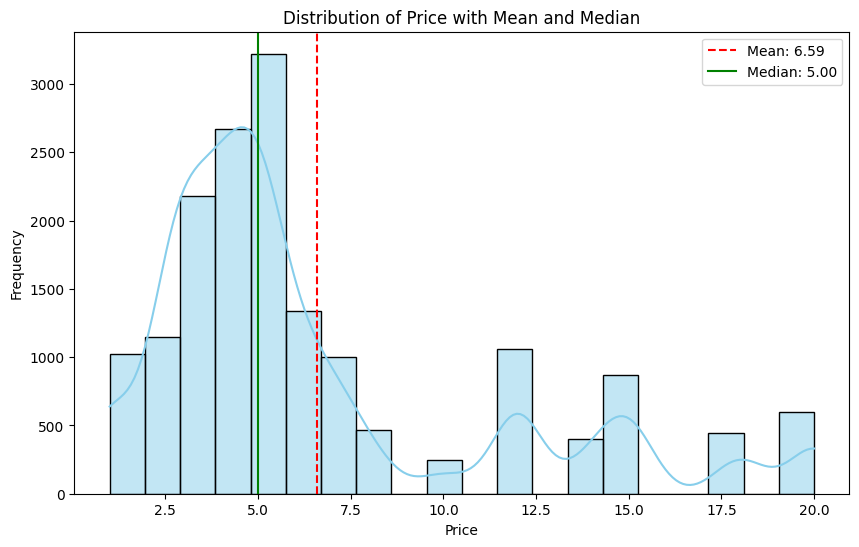

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Plot the distribution
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')

# Calculate mean and median
mean_price = df['Price'].mean()
median_price = df['Price'].median()

# Plot mean and median lines
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', label=f'Median: {median_price:.2f}')

plt.title('Distribution of Price with Mean and Median')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [206]:
df['Price'] = df['Price'].fillna(df['Price'].median())

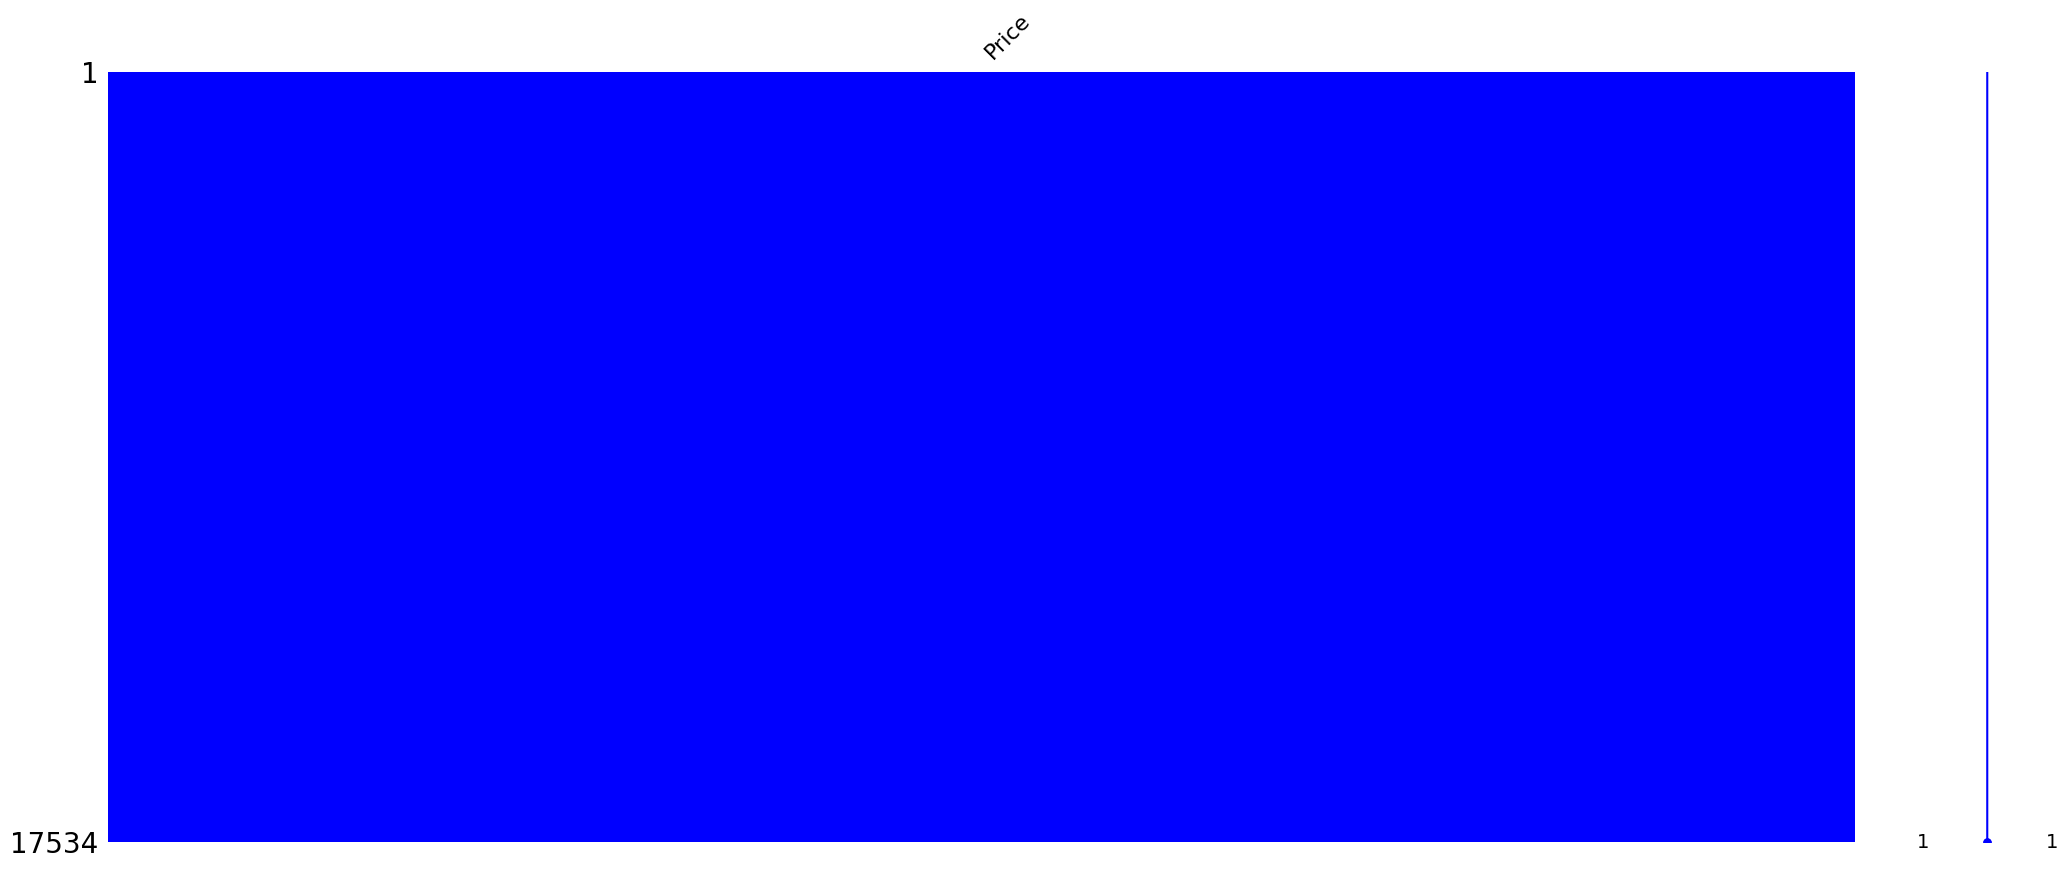

In [209]:
msno.matrix(df[['Price']],color= (0,0,1))
plt.show()

In [211]:
print("Missing Values after Removing:")
count=df['Price'].isnull().sum()
print(int(count))

Missing Values after Removing:
0


In [215]:
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method,Price_clipped
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card,3.0
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet,4.0
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,13.0
3,ORD_630508,CUST_075,Drinks,Pasta Alfredo,5.0,2.0,5.0,2022-08-09,Credit Card,NaN
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash,12.0
...,...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,Pasta Alfredo,5.0,4.0,4.0,2023-12-23,Cash,NaN
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash,5.0
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet,5.0
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet,4.0


In [217]:
df.drop('Price_clipped', axis=1, inplace=True)


In [218]:
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,Pasta Alfredo,5.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,Pasta Alfredo,5.0,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


In [219]:
df.isnull().sum()

Order ID             0
Customer ID          0
Category             0
Item                 0
Price                0
Quantity             0
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64

In [221]:
df['Order Total'].describe()

count    17104.000000
mean        19.914494
std         18.732549
min          1.000000
25%          7.500000
50%         15.000000
75%         25.000000
max        100.000000
Name: Order Total, dtype: float64

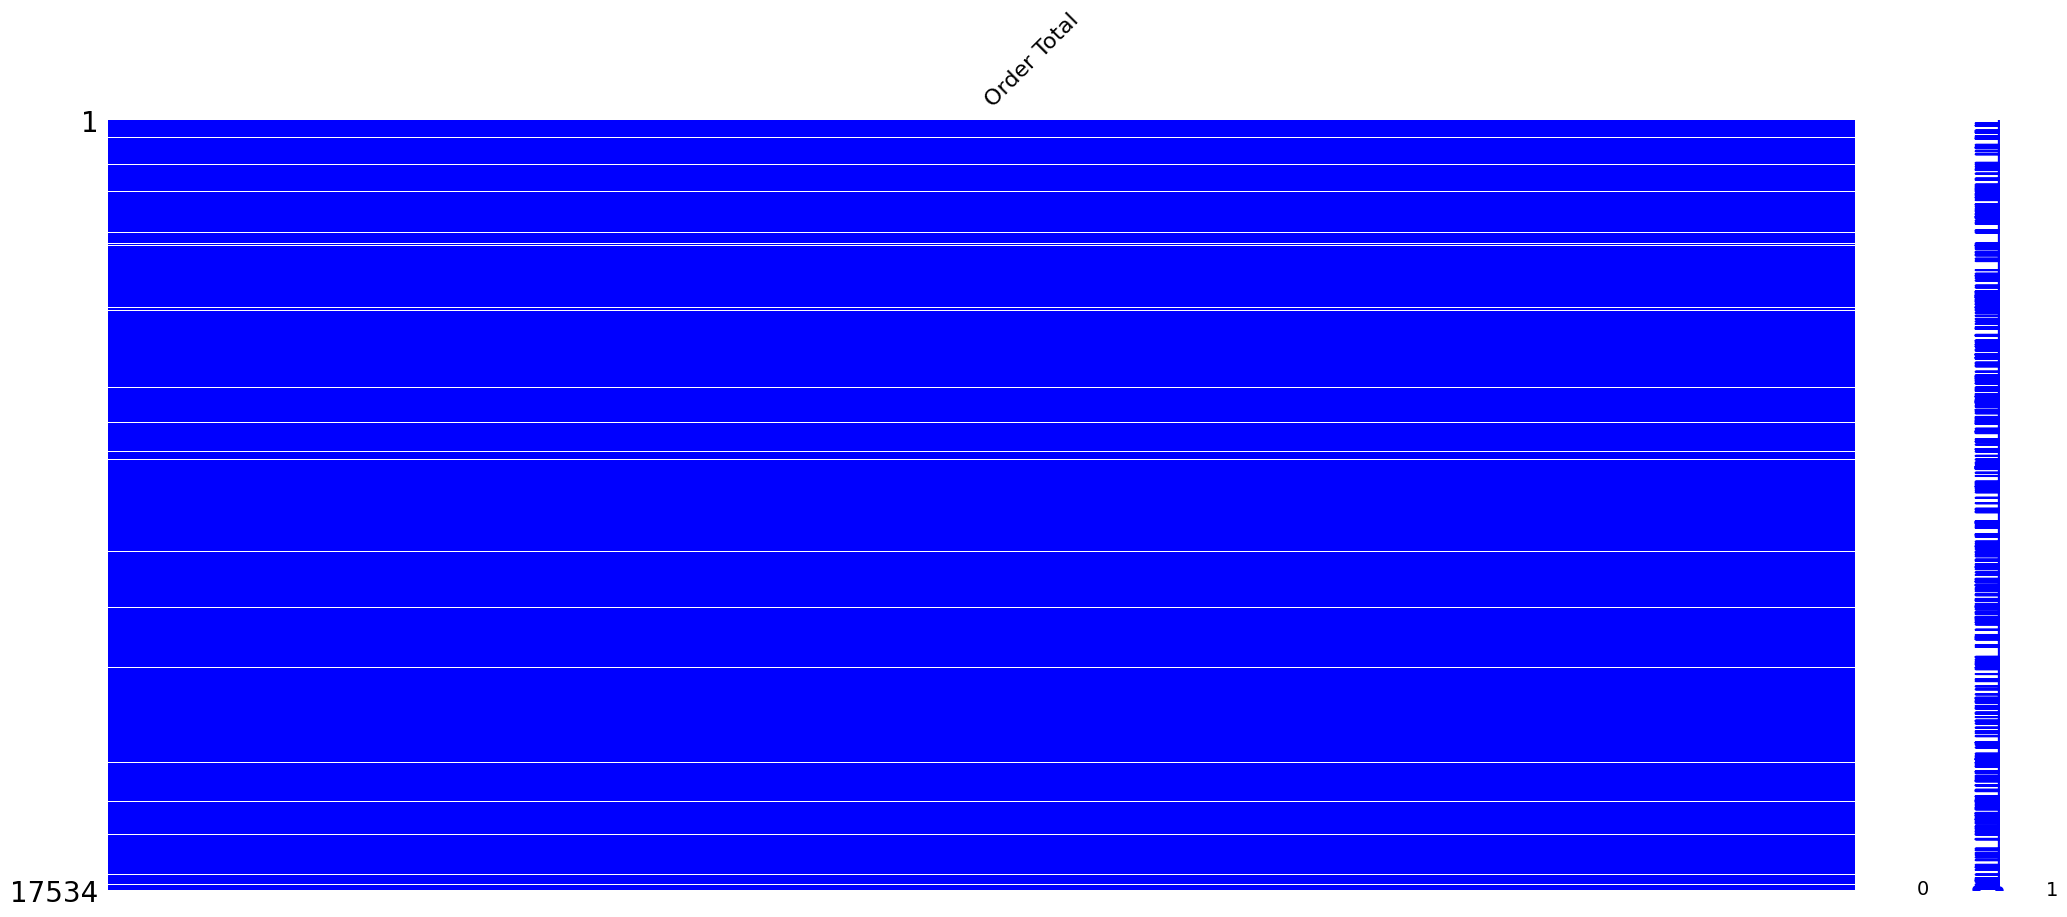

In [222]:
import missingno as msno
msno.matrix(df[['Order Total']],color=(0,0,1))
plt.show()


In [227]:
Q1 = df['Order Total'].quantile(0.25)
Q3 = df['Order Total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df[
    (df['Order Total'] < lower_bound) | (df['Order Total'] > upper_bound)
]

print("Number of outliers in Order Total:", outliers_price.shape[0])

Number of outliers in Order Total: 1409


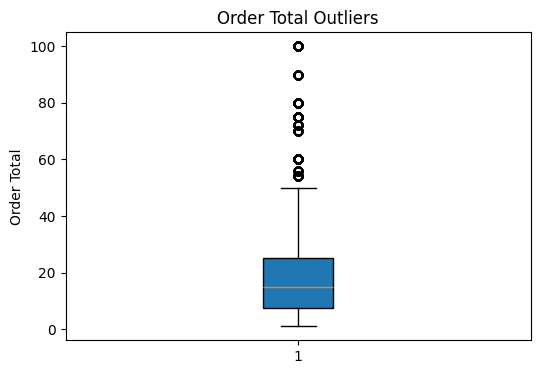

In [228]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    df['Order Total'].dropna(),
    vert=True,
    patch_artist=True
)
plt.title('Order Total Outliers')
plt.ylabel('Order Total')
plt.show()

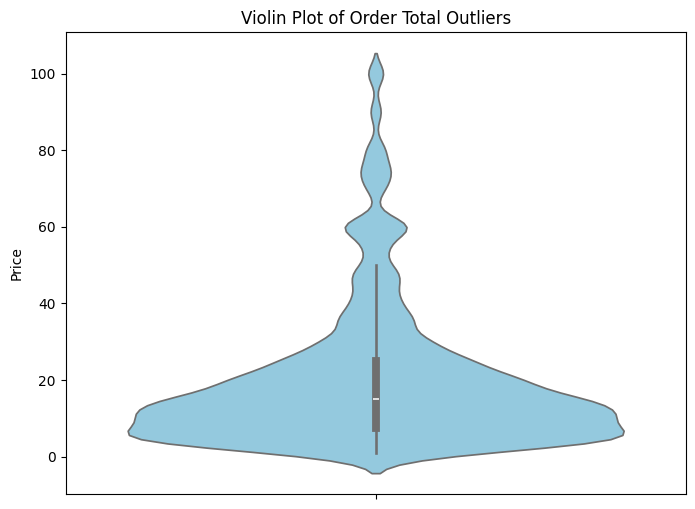

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.violinplot(y=df['Order Total'], color='skyblue')
plt.title('Violin Plot of Order Total Outliers')
plt.ylabel('Price')
plt.show()

In [231]:
# Calculate IQR bounds for Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Order_Total'] = df['Price'].clip(lower=lower_bound, upper=upper_bound)

print(df[['Price', 'Order_Total']].head(10))


   Price  Order_Total
0    3.0          3.0
1    4.0          4.0
2   15.0         11.5
3    5.0          5.0
4   12.0         11.5
5   18.0         11.5
6    4.0          4.0
7   15.0         11.5
8    6.0          6.0
9   14.0         11.5


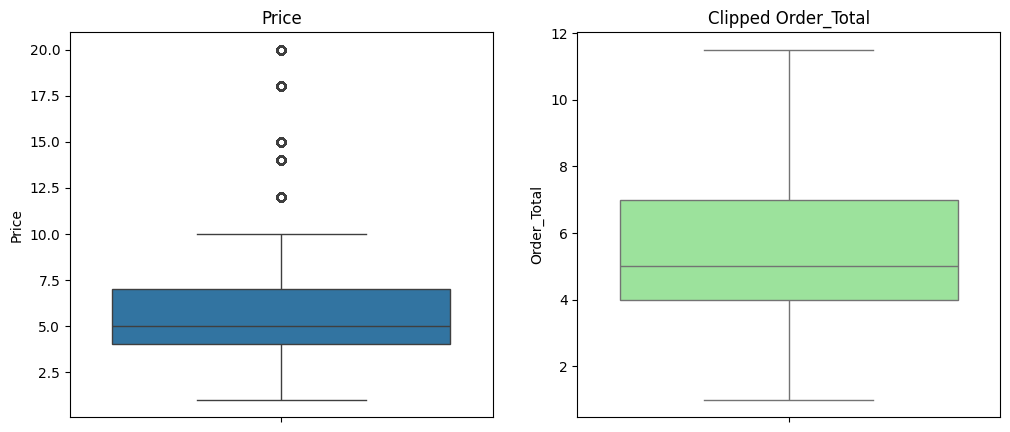

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['Price'])
plt.title('Price')

plt.subplot(1,2,2)
sns.boxplot(y=df['Order_Total'], color='lightgreen')
plt.title('Clipped Order_Total')

plt.show()


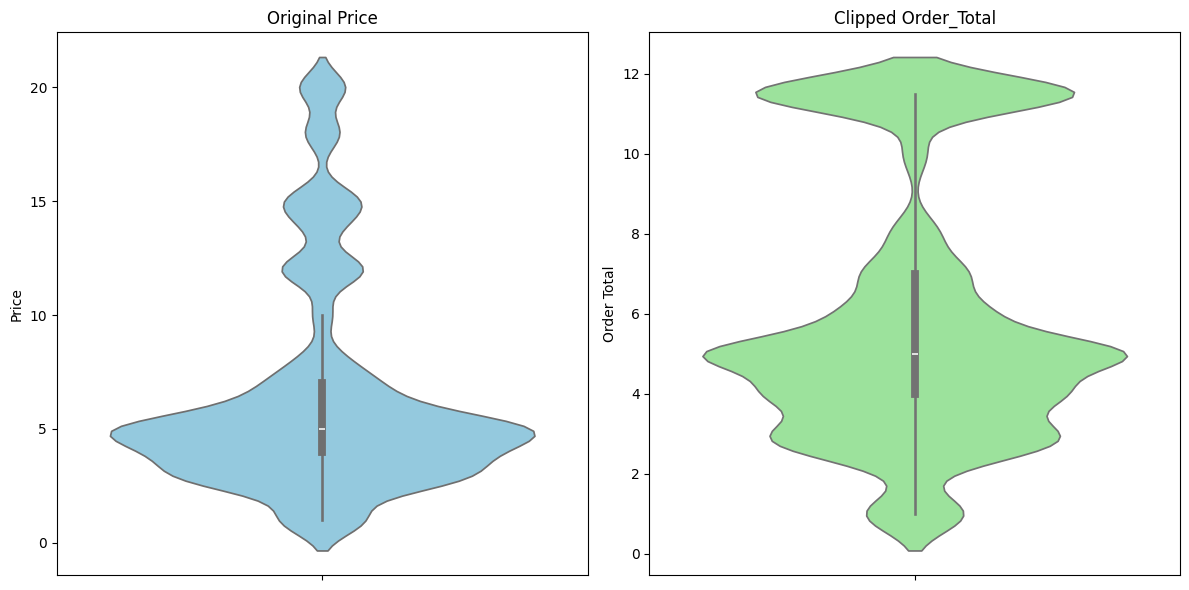

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Original Price
plt.subplot(1, 2, 1)
sns.violinplot(y=df['Price'], color='skyblue')
plt.title('Original Price')
plt.ylabel('Price')

# Clipped Order_Total
plt.subplot(1, 2, 2)
sns.violinplot(y=df['Order_Total'], color='lightgreen')
plt.title('Clipped Order_Total')
plt.ylabel('Order Total')

plt.tight_layout()
plt.show()


In [235]:

Q1 = df['Order_Total'].quantile(0.25)
Q3 = df['Order_Total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Order_Total'] < lower_bound) | (df['Order_Total'] > upper_bound)]

print("Number of outliers after clipping:", outliers.shape[0])
print(outliers[['Order_Total']].head(10))


Number of outliers after clipping: 0
Empty DataFrame
Columns: [Order_Total]
Index: []


In [253]:
df.isnull().sum()

Order ID            0
Customer ID         0
Category            0
Item                0
Price               0
Quantity            0
Order Total       430
Order Date          0
Payment Method      0
Price_clipped       0
Order_Total         0
dtype: int64

In [254]:
df.drop('Order Total', axis=1, inplace=True)


In [255]:
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Date,Payment Method,Price_clipped,Order_Total
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,2023-12-21,Credit Card,3.0,3.0
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,2023-05-19,Digital Wallet,4.0,4.0
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,2023-09-27,Credit Card,11.5,11.5
3,ORD_630508,CUST_075,Drinks,Pasta Alfredo,5.0,2.0,2022-08-09,Credit Card,5.0,5.0
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,2022-05-15,Cash,11.5,11.5
...,...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,Pasta Alfredo,5.0,4.0,2023-12-23,Cash,5.0,5.0
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,2023-12-18,Cash,5.0,5.0
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,2022-05-20,Digital Wallet,5.0,5.0
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,2022-01-27,Digital Wallet,4.0,4.0


In [256]:
df.drop('Price', axis=1, inplace=True)


In [257]:
df

,Order ID,Customer ID,Category,Item,Quantity,Order Date,Payment Method,Price_clipped,Order_Total
0,ORD_705844,CUST_092,Side Dishes,Side Salad,1.0,2023-12-21,Credit Card,3.0,3.0
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,3.0,2023-05-19,Digital Wallet,4.0,4.0
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,4.0,2023-09-27,Credit Card,11.5,11.5
3,ORD_630508,CUST_075,Drinks,Pasta Alfredo,2.0,2022-08-09,Credit Card,5.0,5.0
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,4.0,2022-05-15,Cash,11.5,11.5
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,Pasta Alfredo,4.0,2023-12-23,Cash,5.0,5.0
17530,ORD_974128,CUST_069,Desserts,Ice Cream,3.0,2023-12-18,Cash,5.0,5.0
17531,ORD_108324,CUST_050,Desserts,Ice Cream,4.0,2022-05-20,Digital Wallet,5.0,5.0
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,2.0,2022-01-27,Digital Wallet,4.0,4.0


In [261]:
count=df['Payment Method'].isnull().sum()
print(int(count))

0


In [262]:
df['Payment Method'].head()

0       Credit Card
1    Digital Wallet
2       Credit Card
3       Credit Card
4              Cash
Name: Payment Method, dtype: object

In [258]:
df.isnull().sum()

Order ID          0
Customer ID       0
Category          0
Item              0
Quantity          0
Order Date        0
Payment Method    0
Price_clipped     0
Order_Total       0
dtype: int64

In [246]:
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method,Price_clipped,Order_Total
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card,3.0,3.0
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet,4.0,4.0
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,11.5,11.5
3,ORD_630508,CUST_075,Drinks,Pasta Alfredo,5.0,2.0,5.0,2022-08-09,Credit Card,5.0,5.0
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash,11.5,11.5
...,...,...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,Pasta Alfredo,5.0,4.0,4.0,2023-12-23,Cash,5.0,5.0
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash,5.0,5.0
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet,5.0,5.0
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet,4.0,4.0


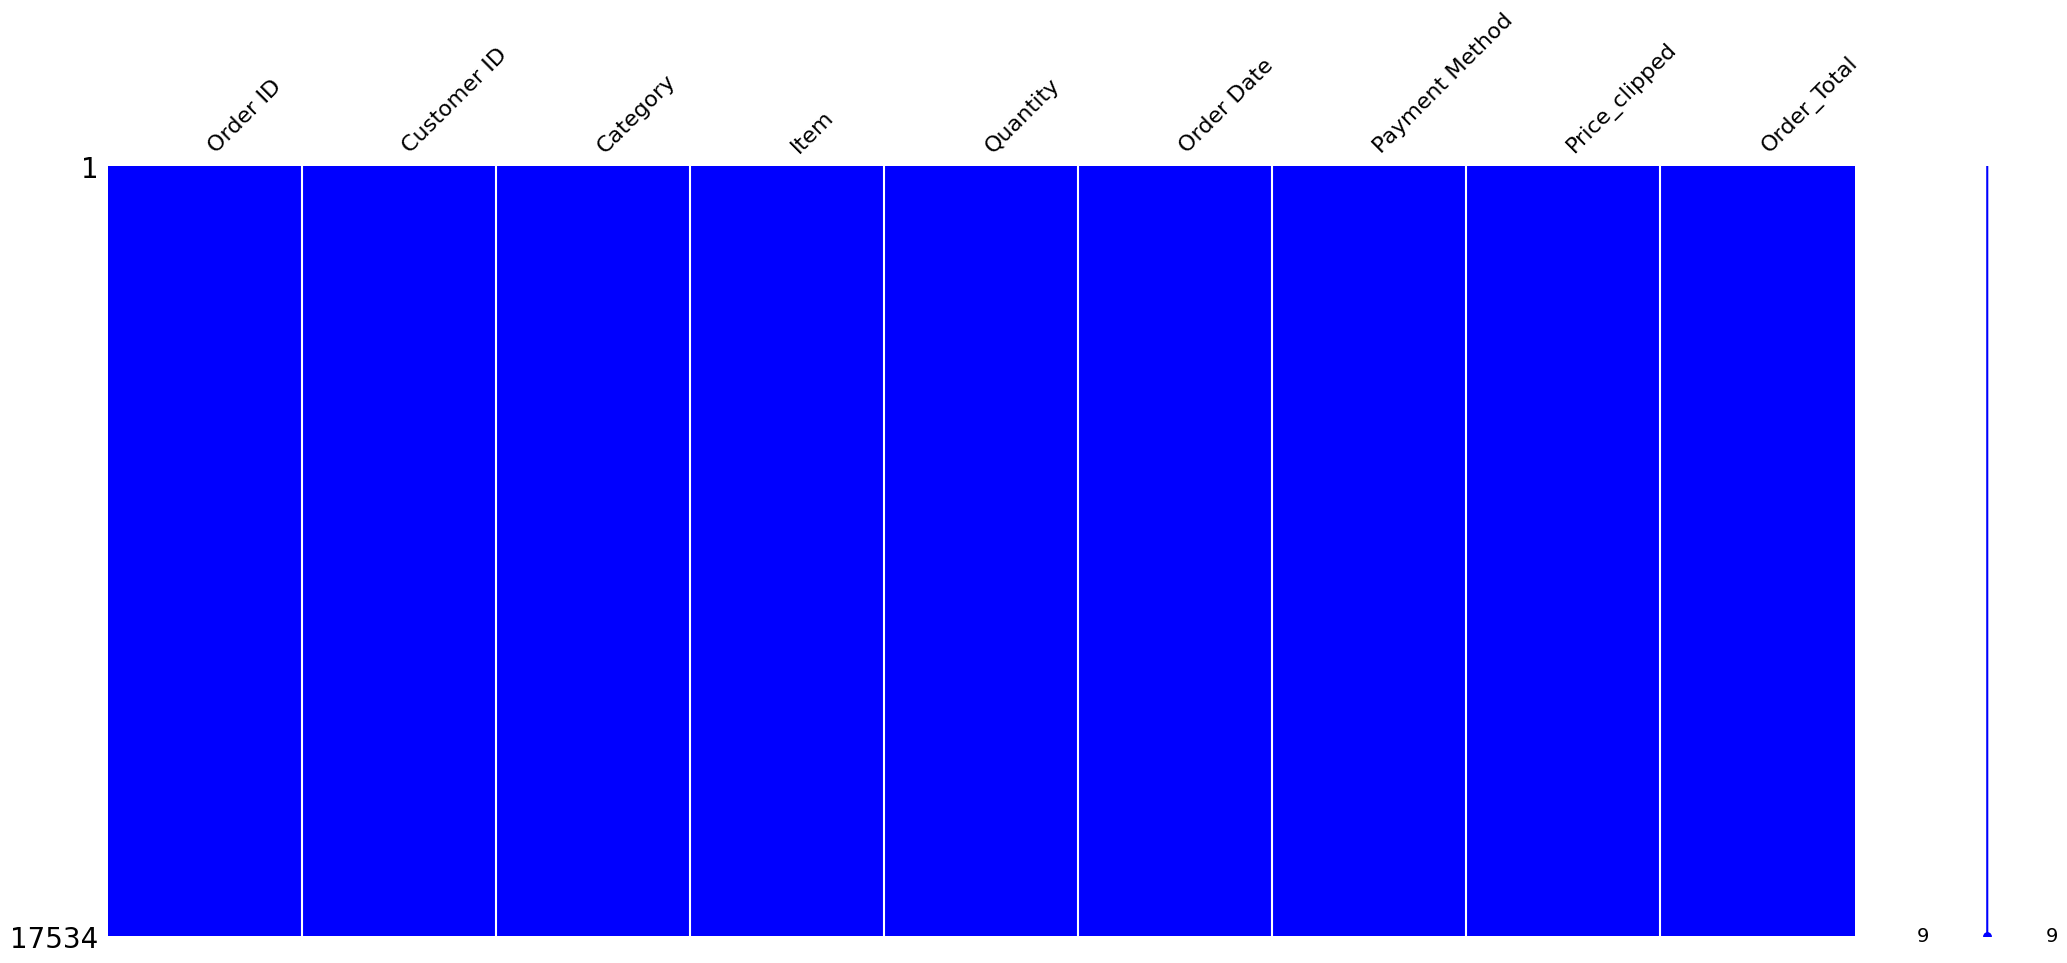

In [263]:
import missingno as msno
msno.matrix(df,color=(0,0,1))
plt.show()

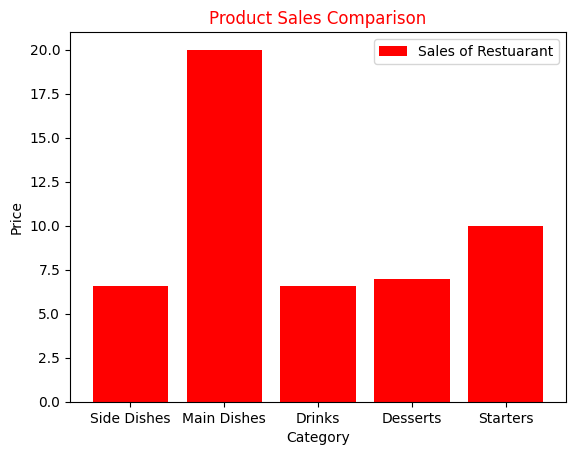

In [46]:
plt.bar(df["Category"],df["Price"],color='red',label='Sales of Restuarant')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Product Sales Comparison',color='red')
plt.legend()
plt.show()

In [264]:
df.to_csv('cleaned_orders.csv', index=False)